In [1]:
from time import time 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.manifold import TSNE

E:\Anaconda1\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = np.load('./data/placement_train.npy')

In [4]:
X = data[:, 0:-1]
Y = data[:, -1]
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

Computing t-SNE embedding


In [ ]:
%matplotlib inline
# 图像大小
fig   = plt.figure(figsize=(8,8))
# 建立坐标系
ax = fig.add_subplot(1,1,1)
# 散点图的x, y 
plt.scatter(X_tsne[:], Y[:], cmap=plt.cm.Spectral)
# 图像标题
plt.title("测试")
plt.show()

In [5]:
new_X = np.column_stack((X_tsne,Y))

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=100)
model.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
model_test = KMeans(n_clusters=100)
model_test.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

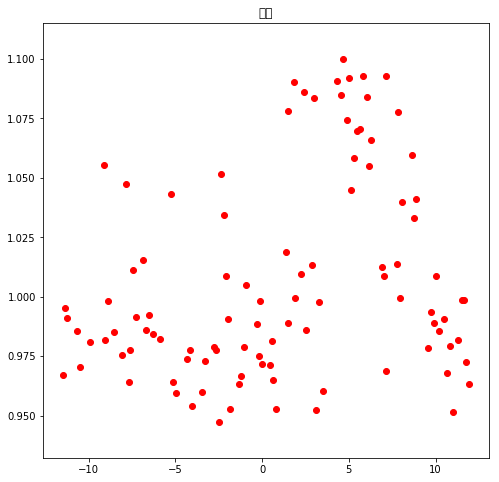

In [8]:
arr = model.cluster_centers_
%matplotlib inline
# 图像大小
fig   = plt.figure(figsize=(8,8))
# 建立坐标系
ax = fig.add_subplot(1,1,1)
# 散点图的x, y 
#plt.scatter(X_tsne[:], Y[:], cmap=plt.cm.Spectral)
plt.scatter(arr[:, 0], arr[:, 1],c="red",cmap=plt.cm.Spectral)
# 图像标题
plt.title("测试")
plt.show()

In [13]:
#选出100个点对应的编号
indices = set([])
for dot in arr:
    for i in range(len(data)):
        if np.linalg.norm(dot - X_tsne[i]) <= 1.205:
            indices.add(i)

In [14]:
len(indices)

100

In [25]:
# 神经网络
from keras.models import Sequential
from keras.layers import Dense, Activation,LeakyReLU
from keras import regularizers
network= Sequential()
network.add(Dense(6, input_shape=(6,)))
network.add(Activation("linear"))
#network.add(LeakyReLU(alpha=0.05))
network.add(Dense(6))
network.add(Activation("linear"))
#network.add(LeakyReLU(alpha=0.05))
network.add(Dense(1, input_shape=(6,)))
#network.add(Activation("linear"))
network.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy', mean_pred])

In [22]:
import keras.backend as K
# 自定义损失函数
def mean_pred(y_true, y_pred):
    result = np.abs(y_pred - y_true) / y_true
    return result

In [15]:
train_X = np.array([data[i, 0:-1] for i in indices]) 
train_Y = np.array([data[i, -1] for i in indices])

In [28]:
network.fit(train_X, train_Y, epochs=50, batch_size=8)

Epoch 1/50
100/100 [==============================] - 0s 608us/step - loss: 0.0023 - acc: 0.0000e+00 - mean_pred: 0.0376
Epoch 2/50
100/100 [==============================] - 0s 688us/step - loss: 0.0023 - acc: 0.0000e+00 - mean_pred: 0.0394
Epoch 3/50
100/100 [==============================] - 0s 529us/step - loss: 0.0024 - acc: 0.0000e+00 - mean_pred: 0.0393
Epoch 4/50
100/100 [==============================] - 0s 529us/step - loss: 0.0024 - acc: 0.0000e+00 - mean_pred: 0.0400
Epoch 5/50
100/100 [==============================] - 0s 529us/step - loss: 0.0019 - acc: 0.0000e+00 - mean_pred: 0.0347
Epoch 6/50
100/100 [==============================] - 0s 539us/step - loss: 0.0023 - acc: 0.0000e+00 - mean_pred: 0.0392
Epoch 7/50
100/100 [==============================] - 0s 588us/step - loss: 0.0021 - acc: 0.0000e+00 - mean_pred: 0.0363
Epoch 8/50
100/100 [==============================] - 0s 558us/step - loss: 0.0021 - acc: 0.0000e+00 - mean_pred: 0.0365
Epoch 9/50
100/100 [============

In [16]:
test_X = np.array([data[i, 0:-1]  for i in range(len(data)) if i not in indices]) 
test_Y = np.array([data[i, -1]  for i in range(len(data)) if i not in indices]) 

In [ ]:
y_pred = network.predict(test_X)

In [ ]:
result = np.abs(y_pred - test_Y) / test_Y
print("预测结果: %.3f " % np.mean(result))

In [ ]:
#network.save("./Leaky_train_1.h5")
network.summary()

In [ ]:
from keras.models import load_model
model = network.load_weights("./Leaky_train.h5")

In [ ]:
y_pred = network.predict(test_X)
new_result = np.abs(y_pred - test_Y) / test_Y
print("预测结果: %.3f " % np.mean(new_result))

In [ ]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(train_X, train_Y)

In [ ]:
y_pred = linear.predict(test_X)
new_result = np.abs(y_pred - test_Y) / test_Y
print("线性模型预测结果: %.3f " % np.mean(new_result))

In [ ]:
Ridge = linear_model.Ridge (alpha = .5)
Ridge.fit(train_X, train_Y)

In [ ]:
y_pred = Ridge.predict(test_X)
new_result = np.abs(y_pred - test_Y) / test_Y
print("岭回归线性模型预测结果: %.3f " % np.mean(new_result))

In [ ]:
from sklearn.externals import joblib
joblib.dump(linear,'linear.m')
joblib.dump(linear,'ridge.m')

In [19]:
len(train_Y)

100

In [20]:
np.save("./test_X.npy", test_X)
np.save("./test_Y.npy", test_Y)
np.save("./train_X.npy", train_X)
np.save("./train_Y.npy", train_Y)